In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = "winemag-data_first150k.csv"

In [3]:
df = pd.read_csv(file)
df = df.drop("Unnamed: 0", axis=1)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB
None
              points          price
count  150930.000000  137235.000000
mean       87.888418      33.131482
std         3.222392      36.322536
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000

In [4]:
mask = pd.notnull(df.country)
df.loc[mask]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [5]:
mask2 = pd.notnull(df.price)
clean_df = df.loc[mask & mask2].reset_index(drop=True)
clean_df['designation'].replace(np.nan,'*Unknown Wine*', inplace=True)
clean_df['region_2'].replace(np.nan,'N/A', inplace=True)

In [6]:
clean_df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,N/A,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,N/A,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
137225,Italy,Many people feel Fiano represents southern Ita...,*Unknown Wine*,91,20.0,Southern Italy,Fiano di Avellino,N/A,White Blend,Feudi di San Gregorio
137226,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,N/A,Champagne Blend,H.Germain
137227,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,N/A,White Blend,Terredora
137228,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,N/A,Champagne Blend,Gosset


In [7]:
mask3 = clean_df.country == "US-France"
clean_df.loc[mask3]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
130712,US-France,"Defies categorization, in more ways than one. ...",*Unknown Wine*,88,50.0,Santa Barbara County-Condrieu,NaN,N/A,Viognier,Deux C


In [8]:
#Top 10 wine producing countries
top10 = clean_df.country.value_counts()[0:10].sort_values(ascending=True)

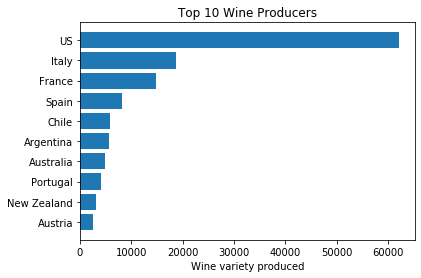

In [9]:
plt.barh(top10.index, top10.values)
plt.xlabel("Total wine variety produced")
plt.title("Top 10 Wine Producers")
plt.show()

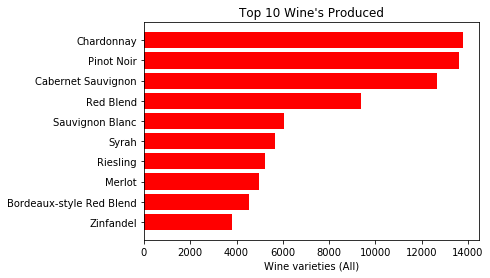

In [52]:
#Top 10 variety of wines
variety10 = clean_df.variety.value_counts()[0:10].sort_values(ascending=True)
plt.barh(variety10.index, variety10.values,color='r')
plt.xlabel("Wine varieties (All)")
plt.title("Top 10 Wine's Produced")
plt.show()

In [11]:
#Variety of wine counts
counts = clean_df.variety.value_counts()
counts

Chardonnay            13775
Pinot Noir            13625
Cabernet Sauvignon    12671
Red Blend              9377
Sauvignon Blanc        6054
                      ...  
Kinali Yapincak           1
Dafni                     1
Chardonelle               1
Erbaluce                  1
Ugni Blanc                1
Name: variety, Length: 619, dtype: int64

In [12]:
counts.to_csv("Wine.csv", index=True)

<BarContainer object of 619 artists>

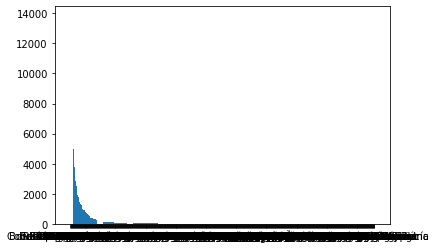

In [13]:
plt.bar(counts.index, counts.values)

In [14]:
clean_df.price.sort_values(ascending=False)

31848    2300.0
12540    2013.0
31850    1900.0
47132    1400.0
24017    1400.0
          ...  
81814       4.0
23430       4.0
72419       4.0
1764        4.0
31390       4.0
Name: price, Length: 137230, dtype: float64

C:\Users\DanMona\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


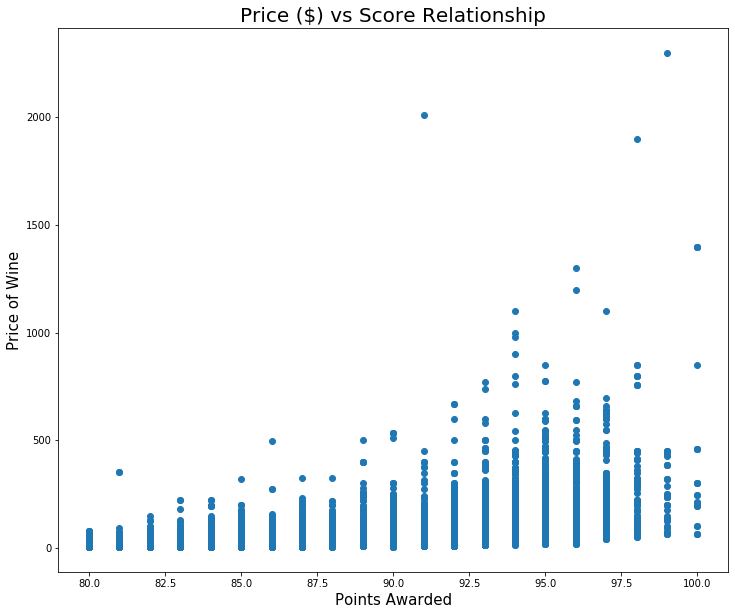

In [15]:
#Plot showing relationship between price of wine and points awarded.
plt.figure(figsize=(12,10))
plt.xlabel("Points Awarded",fontsize=15)
plt.ylabel("Price of Wine",fontsize=15)
plt.title("Price ($) vs Score Relationship",fontsize=20)

x_array = np.array(clean_df['points'])
y_array = np.array(clean_df['price'])
log_x_data = np.log(x_array)
log_y_data = np.log(y_array)
y = np.exp(-45.86) * np.exp(10.97*x_array)
curved_fit = np.polyfit(log_x_data,log_y_data, 1)

plt.scatter(clean_df['points'],clean_df['price'])
plt.plot(x_array,y)
plt.show()

In [16]:
#Replaced NaN values in designation and region_2 columns
clean_df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,N/A,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,N/A,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
137225,Italy,Many people feel Fiano represents southern Ita...,*Unknown Wine*,91,20.0,Southern Italy,Fiano di Avellino,N/A,White Blend,Feudi di San Gregorio
137226,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,N/A,Champagne Blend,H.Germain
137227,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,N/A,White Blend,Terredora
137228,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,N/A,Champagne Blend,Gosset


    country     points
0   England  92.750000
1   Austria  89.190898
2   Germany  88.610567
3    France  88.603314
4     Italy  88.445006
5    Canada  88.221649
6  Portugal  88.176724
7  Slovenia  88.172840
8   Morocco  88.166667
9    Turkey  88.140000


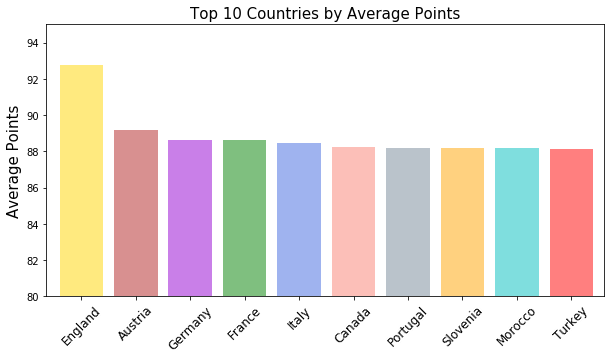

In [56]:
#Top 10 Wines by Country, Top 10 Wines by Region
country_Group = clean_df.groupby(['country']).mean()['points']
top10Avg = (country_Group.sort_values(ascending=False).head(10))
top10Country = pd.DataFrame(top10Avg)
top10Country.reset_index(inplace=True)
print(top10Country)
color = ['gold','firebrick','darkviolet','green','royalblue','salmon','lightslategrey','orange','c','r']
x_axis = np.arange(len(top10Country['country']))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize=(10,5))
plt.bar(x_axis, top10Country['points'], alpha=0.5, align="edge")
plt.xticks(tick_locations, top10Country['country'],rotation=45, fontsize=12)
plt.ylim(80, 95)
plt.xlim(-0.25, len(x_axis))

plt.title("Top 10 Countries by Average Points",fontsize=15)

plt.ylabel("Average Points",fontsize=15)

plt.show()